# IDM DataScience course final project submission

## Capstone Project -CAR Accident Severity

### Introduction/Business Problem

Considering the traffic conditions in the Seattle city let's consider a business model like installing accident prone areas signboard at the areas where more severe accidents occur. To predict the top 10 vulnerable places it is required to collect the accident data.The dataset is obtained from SDOT traffic management system available from 2004 to present. In order to predict the most vulnerable places to accident the following factors are considered i.e. time of occurrence, weather, fatalities, traffic delay, property damage etc. So, considering these factors the data has to be segregated and cleaned for predicting the accident severity at those 10 vulnerable places.

### About Data Set 

This dataset is about past accident data. The Data-Collisions.csv data set includes details of 194673 accidents from 2004 to 2020. It has a total of 38 fields. The following fields are as below.


* OBJECTID:- ESRI unique identifier
* SHAPE:- ESRI geometry field
* INCKEY:-  unique key for the incident
* COLDETKEY:-Secondary key for the incident
* ADDRTYPE:- Collision address type: Alley\Block\Intersection
* INTKEY :- Key that corresponds to the intersection associated with a collision 
* LOCATION:-Description of the general location of the collision
* EXCEPTRSNCODE 
* EXCEPTRSNDESC 
* SEVERITYCODE:- A code that corresponds to the severity of the collision(3—fatality,2b—serious injury,2—injury,1—prop damage,0—unknown)
* SEVERITYDESC:-A detailed description of the severity of the collision
* COLLISIONTYPE:- Collision type
* PERSONCOUNT :- The total number of people involved in the collision
* PEDCOUNT :- The number of pedestrians involved in the collision. This is entered by the state.
* PEDCYLCOUNT :- The number of bicycles involved in the collision.This is entered by the state.
* VEHCOUNT :- The number of vehicles involved in the collision.This is entered by the state.
* INJURIES :- The number of total injuries in the collision. Thisis entered by the state.
* SERIOUSINJURIES :- The number of serious injuries in the collision.This is entered by the state.
* FATALITIES :- The number of fatalities in the collision. This isentered by the state.
* INCDATE :- The date of the incident.
* INCDTTM :- The date and time of the incident.
* JUNCTIONTYPE:- Category of junction at which collision took place
* SDOT_COLCODE :- A code given to the collision by SDOT.
* SDOT_COLDESC :- A description of the collision corresponding to the collision code.
* INATTENTIONIND :-Whether or not collision was due to inattention. (Y/N)
* UNDERINFL:- Whether or not a driver involved was under the influence of drugs or alcohol.
* WEATHER:- A description of the weather conditions during the time of the collision.
* ROADCOND :- The condition of the road during the collision.
* LIGHTCOND:- The light conditions during the collision.
* PEDROWNOTGRNT :- Whether or not the pedestrian right of way was not granted. (Y/N)
* SDOTCOLNUM :- A number given to the collision by SDOT.
* SPEEDING :- Whether or not speeding was a factor in the collision. (Y/N)
* ST_COLCODE:- A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary.
* ST_COLDESC:- A description that corresponds to the state’s coding designation.
* SEGLANEKEY:- A key for the lane segment in which the collision occurred.
* CROSSWALKKEY:- A key for the crosswalk at which the collision occurred.
* HITPARKEDCAR:- Whether or not the collision involved hitting a parked car. (Y/N) 


So the data has to be prepared before building a model.Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis. The steps followed are as shown below.
* Identifying and handling missing values
* Data Evaluation
* Data Standardization

##### Import Libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

##### Download the data set

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-17 13:21:23--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  34.9MB/s   in 2.0s   

2020-10-17 13:21:25 (34.9 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



##### Load data from csv file

In [3]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

##### Data Wrangling

* Identify and handle missing values

In [5]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
#Evaluating for missing data
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [7]:
#Count missing values for each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

To deal with missing data we either drop the data or replace with mean values or the frequency of its occurence.
Some fields are not required for current bussiness scenario so first drop those fields. And also some fields the missing data is huge so i am removing those fields as well. The fields i am dropping are OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,INTKEY,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1, SEVERITYDESC,SDOT_COLDESC,INATTENTIONIND,SDOTCOLNUM,SPEEDING,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,PEDROWNOTGRNT,ST_COLCODE,INCDATE

* Data Evaluaion

In [8]:
#Let's drop the unwanted attributes 
df.drop(["OBJECTID","INCKEY","COLDETKEY","REPORTNO","STATUS","INTKEY","EXCEPTRSNCODE","EXCEPTRSNDESC","EXCEPTRSNCODE","SEVERITYCODE.1","SEVERITYDESC","SDOT_COLDESC","INATTENTIONIND","SDOTCOLNUM","SPEEDING","ST_COLDESC","SEGLANEKEY","CROSSWALKKEY","PEDROWNOTGRNT","ST_COLCODE","INCDATE"],axis=1,inplace=True)
df.head(10)

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,0,Raining,Wet,Daylight,N
5,1,-122.387598,47.690575,Intersection,24TH AVE NW AND NW 85TH ST,Angles,2,0,0,2,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,N,Clear,Dry,Daylight,N
6,1,-122.338485,47.618534,Intersection,DENNY WAY AND WESTLAKE AVE,Angles,2,0,0,2,12/9/2008,At Intersection (intersection related),11,0,Raining,Wet,Daylight,N
7,2,-122.320780,47.614076,Intersection,BROADWAY AND E PIKE ST,Cycles,3,0,1,1,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,N,Clear,Dry,Daylight,N
8,1,-122.335930,47.611904,Block,PINE ST BETWEEN 5TH AVE AND 6TH AVE,Parked Car,2,0,0,2,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,N
9,2,-122.384700,47.528475,Intersection,41ST AVE SW AND SW THISTLE ST,Angles,2,0,0,2,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,0,Clear,Dry,Daylight,N


In [9]:
#Address types
df['ADDRTYPE'].value_counts()
#To calculate most common type
df['ADDRTYPE'].value_counts().idxmax()
#Replace NaN values with most common type
df["ADDRTYPE"].replace(np.nan, "Block", inplace=True)

In [10]:
#Location
df['LOCATION'].value_counts()
#To calculate most common type
df['LOCATION'].value_counts().idxmax()
#Replace NaN values with most common type
df["LOCATION"].replace(np.nan, "BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N", inplace=True)

In [11]:
#COLLISIONTYPE
df['COLLISIONTYPE'].value_counts()
#To calculate most common type
df['COLLISIONTYPE'].value_counts().idxmax()
#Replace NaN values with most common type
df["COLLISIONTYPE"].replace(np.nan, "Parked Car", inplace=True)

In [12]:
#WEATHER
df['WEATHER'].value_counts()
#To calculate most common type
df['WEATHER'].value_counts().idxmax()
#Replace NaN values with most common type
df["WEATHER"].replace(np.nan, "Clear", inplace=True)

In [13]:
#ROADCOND
df['ROADCOND'].value_counts()
#To calculate most common type
df['ROADCOND'].value_counts().idxmax()
#Replace NaN values with most common type
df["ROADCOND"].replace(np.nan, "Dry", inplace=True)

In [14]:
#LIGHTCOND
df['LIGHTCOND'].value_counts()
#To calculate most common type
df['LIGHTCOND'].value_counts().idxmax()
#Replace NaN values with most common type
df["LIGHTCOND"].replace(np.nan, "Daylight", inplace=True)

In [15]:
#Check if the fields are in correct data types
df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
ADDRTYPE          object
LOCATION          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
JUNCTIONTYPE      object
SDOT_COLCODE       int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
HITPARKEDCAR      object
dtype: object

* Data Standarization

The fields  INCDTTM should be of date time object. So need to convert the data types of these two fields.

In [16]:
# Convert the INCDTTM field to date time object
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,2013-03-27 14:54:00,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,2006-12-20 18:55:00,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,2004-11-18 10:20:00,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,2004-01-28 08:04:00,At Intersection (intersection related),11,0,Raining,Wet,Daylight,N


##### Data Visualisation and Pre-processing

To identify top 10 accident prone locations i am considering location field as a dependent variable for rest of the fields. So inorder to observe the pattern of these occurences,i am considering Histogram plot to observe the frequency of accidents occurred for each day of the week,most frequent type of collisions and ADDRtype category based on severity code. While pie chart is used for the visualising the weather, road condition and light conditions at the time of accident based on severity code.

In [17]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0        --> 2020.10.14-0      anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1h-h7b6447c_0  --> 1.1.1h-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

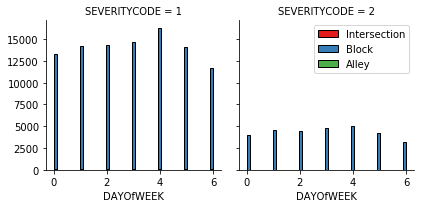

In [18]:
#Let's extract day of the week from INCDTTM column to identify the no of accidents occurred at which day of the week for ADDRTPE 
import seaborn as sns
df['DAYOfWEEK'] = df['INCDTTM'].dt.dayofweek
bins = np.linspace(df.DAYOfWEEK.min(), df.DAYOfWEEK.max(), 50)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="ADDRTYPE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'DAYOfWEEK', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

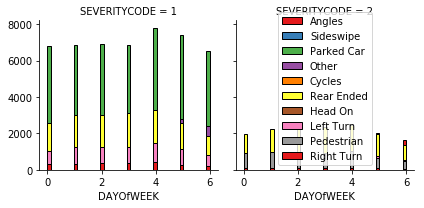

In [19]:
df['DAYOfWEEK'] = df['INCDTTM'].dt.dayofweek
bins = np.linspace(df.DAYOfWEEK.min(), df.DAYOfWEEK.max(), 50)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="COLLISIONTYPE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'DAYOfWEEK', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


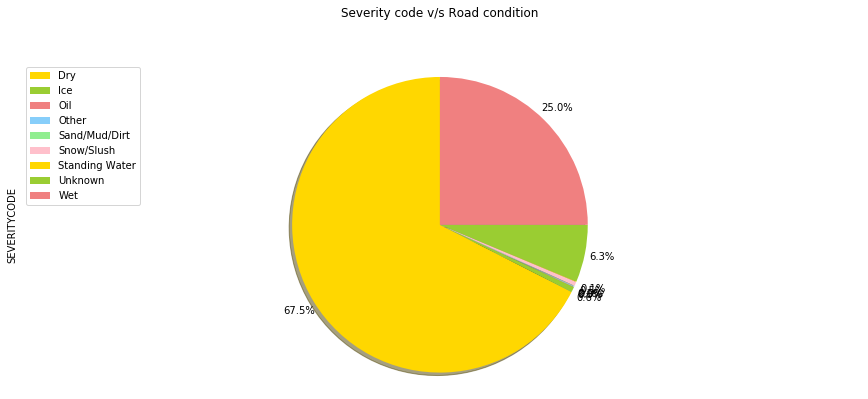

In [20]:
#Plot to know the road condition for most of the accidents

df_RC = df.groupby('ROADCOND', axis=0).sum()
print(type(df.groupby('ROADCOND', axis=0)))

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

df_RC['SEVERITYCODE'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                          )

plt.title('Severity code v/s Road condition',y=1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_RC.index, loc='upper left') 
plt.show()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


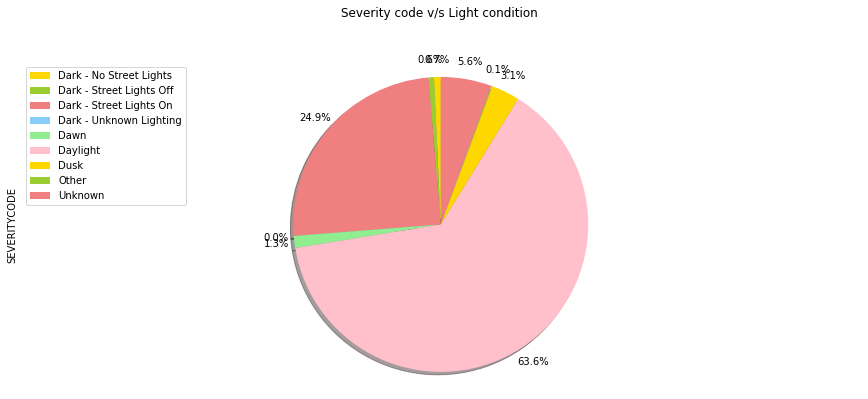

In [21]:
#Plot to understand the lightcondition for most of the accidents

df_LC = df.groupby('LIGHTCOND', axis=0).sum()
print(type(df.groupby('LIGHTCOND', axis=0)))

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

df_LC['SEVERITYCODE'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                          )

plt.title('Severity code v/s Light condition',y=1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_LC.index, loc='upper left') 
plt.show()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


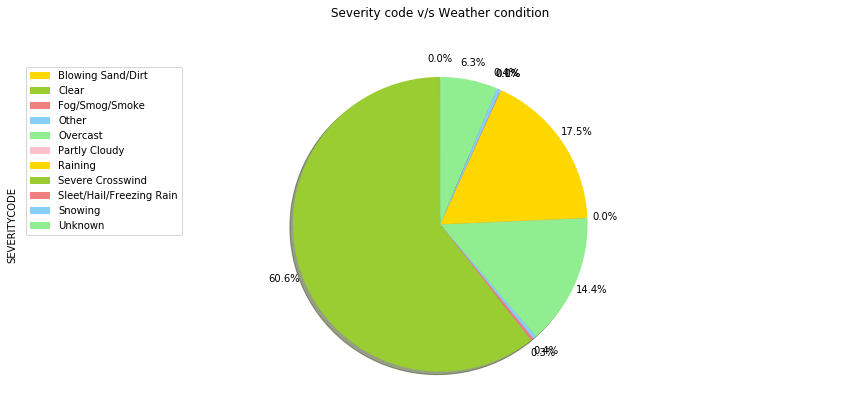

In [22]:
#Plot for weather condition

df_W = df.groupby('WEATHER', axis=0).sum()
print(type(df.groupby('WEATHER', axis=0)))

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

df_W['SEVERITYCODE'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                          )

plt.title('Severity code v/s Weather condition',y=1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_W.index, loc='upper left') 
plt.show()

#### Methodology

So to determine the top 10 accident prone areas, the major factors influcing the accidents are Day of the week, weather, light condition, road condition and address type. Based on these conditions the top most accident prone locations can be identified. Hence we use linear plot regression, KNN and Decision tree methods to test and train data and evaluate the model

* Convert Categorical features to numerical values

In [23]:
df.groupby(['SEVERITYCODE'])['ADDRTYPE'].value_counts(normalize=True)
df['ADDRTYPE'].replace(to_replace=['Block','Intersection','Alley'], value=[2,1,0],inplace=True)

In [24]:
df['HOURS'] = df['INCDTTM'].dt.hour
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,DAYOfWEEK,HOURS
0,2,-122.323148,47.703140,1,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,2013-03-27 14:54:00,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,N,2,14
1,1,-122.347294,47.647172,2,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,2006-12-20 18:55:00,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,N,2,18
2,1,-122.334540,47.607871,2,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,2004-11-18 10:20:00,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,N,3,10
3,1,-122.334803,47.604803,2,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,N,4,9
4,2,-122.306426,47.545739,1,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,2004-01-28 08:04:00,At Intersection (intersection related),11,0,Raining,Wet,Daylight,N,2,8


In [25]:
Factors = df[['SEVERITYCODE','ADDRTYPE','PERSONCOUNT','SDOT_COLCODE','DAYOfWEEK','HOURS']]
Factors = pd.concat([Factors,pd.get_dummies(df['WEATHER'])], axis=1)
Factors.drop(['Blowing Sand/Dirt','Other','Partly Cloudy','Severe Crosswind','Sleet/Hail/Freezing Rain','Unknown'], axis = 1,inplace=True)
Factors.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,SDOT_COLCODE,DAYOfWEEK,HOURS,Clear,Fog/Smog/Smoke,Overcast,Raining,Snowing
0,2,1,2,11,2,14,0,0,1,0,0
1,1,2,2,16,2,18,0,0,0,1,0
2,1,2,4,14,3,10,0,0,1,0,0
3,1,2,3,11,4,9,1,0,0,0,0
4,2,1,2,11,2,8,0,0,0,1,0


In [26]:
#Similarly for lightcond and road cond also ROADCOND	LIGHTCOND
Factors = pd.concat([Factors,pd.get_dummies(df['LIGHTCOND'])], axis=1)
Factors.drop(['Dark - Unknown Lighting','Other','Unknown'], axis = 1,inplace=True)
Factors.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,SDOT_COLCODE,DAYOfWEEK,HOURS,Clear,Fog/Smog/Smoke,Overcast,Raining,Snowing,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
0,2,1,2,11,2,14,0,0,1,0,0,0,0,0,0,1,0
1,1,2,2,16,2,18,0,0,0,1,0,0,0,1,0,0,0
2,1,2,4,14,3,10,0,0,1,0,0,0,0,0,0,1,0
3,1,2,3,11,4,9,1,0,0,0,0,0,0,0,0,1,0
4,2,1,2,11,2,8,0,0,0,1,0,0,0,0,0,1,0


In [27]:
Factors = pd.concat([Factors,pd.get_dummies(df['ROADCOND'])], axis=1)
Factors.drop(['Oil','Sand/Mud/Dirt','Standing Water','Other','Unknown'], axis = 1,inplace=True)
Factors.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,SDOT_COLCODE,DAYOfWEEK,HOURS,Clear,Fog/Smog/Smoke,Overcast,Raining,...,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk,Dry,Ice,Snow/Slush,Wet
0,2,1,2,11,2,14,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,1,2,2,16,2,18,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,1,2,4,14,3,10,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,1,2,3,11,4,9,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,2,1,2,11,2,8,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


##### Feature Selection

In [28]:
X = Factors
X[0:5]

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,SDOT_COLCODE,DAYOfWEEK,HOURS,Clear,Fog/Smog/Smoke,Overcast,Raining,...,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk,Dry,Ice,Snow/Slush,Wet
0,2,1,2,11,2,14,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,1,2,2,16,2,18,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,1,2,4,14,3,10,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,1,2,3,11,4,9,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,2,1,2,11,2,8,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [29]:
y = df['LOCATION'].values
y[0:5]

array(['5TH AVE NE AND NE 103RD ST',
       'AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N',
       '4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST',
       '2ND AVE BETWEEN MARION ST AND MADISON ST',
       'SWIFT AVE S AND SWIFT AV OFF RP'], dtype=object)

### Train and Test the model 

In [30]:
# split train_data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4 )
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 21) (155738,)
Test set: (38935, 21) (38935,)


#### KNN

In [31]:
#KNN Method
#Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



In [32]:
# try with 10 different values of k to find the best one
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# accuracy
print(mean_acc)

[0.00559908 0.0060357  0.00590728 0.00670348 0.007474   0.00775652
 0.00806472 0.00862977 0.00914344]


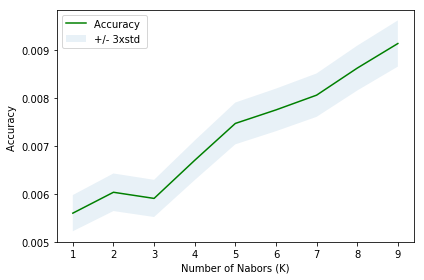

The best accuracy was with 0.00914344420187492 with k= 9


In [33]:
# Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

# result
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

In [34]:
# train model with k=9
neigh = KNeighborsClassifier(n_neighbors = 9 ).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

#### DECESSION TREE

In [35]:
# import library
from sklearn.tree import DecisionTreeClassifier
# create an instance of the DecisionTreeClassifier called AccidentLocations
AccidentLocations = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
# training
AccidentLocations.fit(X_train,y_train)
AccidentLocations

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Model Evaluation

In [37]:
#Import libraries
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#KNN
# predicted y
yhat_knn = neigh.predict(X_test)

# jaccard
jaccard_knn = jaccard_similarity_score(y_test, yhat_knn)
print("KNN Jaccard index: ", jaccard_knn)

# f1_score
f1_score_knn = f1_score(y_test, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

#Decession Tree
# predicted y
yhat_dt = AccidentLocations.predict(X_test)

# jaccard
jaccard_dt = jaccard_similarity_score(y_test, yhat_dt)
print("DT Jaccard index: ", jaccard_dt)

# f1_score
f1_score_dt = f1_score(y_test, yhat_dt, average='weighted')
print("DT F1-score: ", f1_score_dt)




KNN Jaccard index:  0.00914344420187492


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


KNN F1-score:  0.006031976336003138
DT Jaccard index:  0.015718505200975987
DT F1-score:  0.0007225980451793853


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
